In [3]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
df = pd.read_csv('081520-082120.csv')
df.set_index('Conversation Id', inplace=True)
df = df[ df.Channel != 'eddie_go_sdk' ]
df.drop(['Domain', 'Escalated',  'Abandoned', 'Amelia Handled',
       'Amelia Abandoned', 'Escalate Abandoned', 'Total Handle Time',
       'Executed BPNs', 'User Name', 'User Email','Created', 'Finished', 'Status', 'Primary Agent Email', 'Primary Agent Handle Time', 'Primary Agent Answer Speed', 'Pickup SLA Violation', 'Channel', 'Escalation Queue', 'Escalation Reason', 'Agent Handled', 'Agent Abandoned', 'User External Uid'], axis=1, inplace=True)


In [5]:
skill_start = df['Custom Metrics'].str.extract(r'skill_start=(?P<skill_start>.*?)\|\|')
surveys = df['Custom Metrics'].str.extract(r'survey_response=(?P<survey_response>[1|2|3|4|5])')
skill_complete = df['Custom Metrics'].str.extract(r'skill_complete=(?P<skill_complete>.*?)\|\|')
escalated_custom = df['Custom Metrics'].str.extract(r'escalated_custom=(?P<escalated_custom>[0|1])')
abandoned_custom = df['Custom Metrics'].str.extract(r'abandoned_custom=(?P<abandoned_custom>[0|1])')
sap_skill = df['Custom Metrics'].str.extract(r'sap_skill=(?P<sap_skill>[0|1])')
sap_rpa = df['Custom Metrics'].str.extract(r'sap_rpa=(?P<sap_rpa>[0|1])')
sap_remedy = df['Custom Metrics'].str.extract(r'sap_remedy=(?P<sap_remedy>[0|1])')

skill_start = pd.concat([skill_start,skill_start.skill_start.str.get_dummies(sep=',')],1)
skill_start = skill_start.add_prefix('skill_start:')
skill_complete = pd.concat([skill_complete,skill_complete.skill_complete.str.get_dummies(sep=',')],1)
skill_complete = skill_complete.add_prefix('skill_complete:')

In [6]:
new_df = df.join(surveys).join(skill_start).join(skill_complete).join(escalated_custom).join(abandoned_custom).join(sap_skill).join(sap_remedy).join(sap_rpa)

In [7]:
skill_complete.loc["LT7U2DZDYAIAA-1"]

skill_complete:skill_complete            sap_faq_rpa,
skill_complete:account_locked                       0
skill_complete:citrix_session_restart               0
skill_complete:covid                                0
skill_complete:faq_okta_enrollment                  0
skill_complete:faq_pto                              0
skill_complete:null                                 0
skill_complete:nullticket_status                    0
skill_complete:open_ticket                          0
skill_complete:password_reset                       0
skill_complete:sap_access_te                        0
skill_complete:sap_faq_rpa                          1
skill_complete:sap_grc                              0
skill_complete:sap_hr_support                       0
skill_complete:social_who_are_you                   0
skill_complete:ticket_status                        0
Name: LT7U2DZDYAIAA-1, dtype: object

<AxesSubplot:>

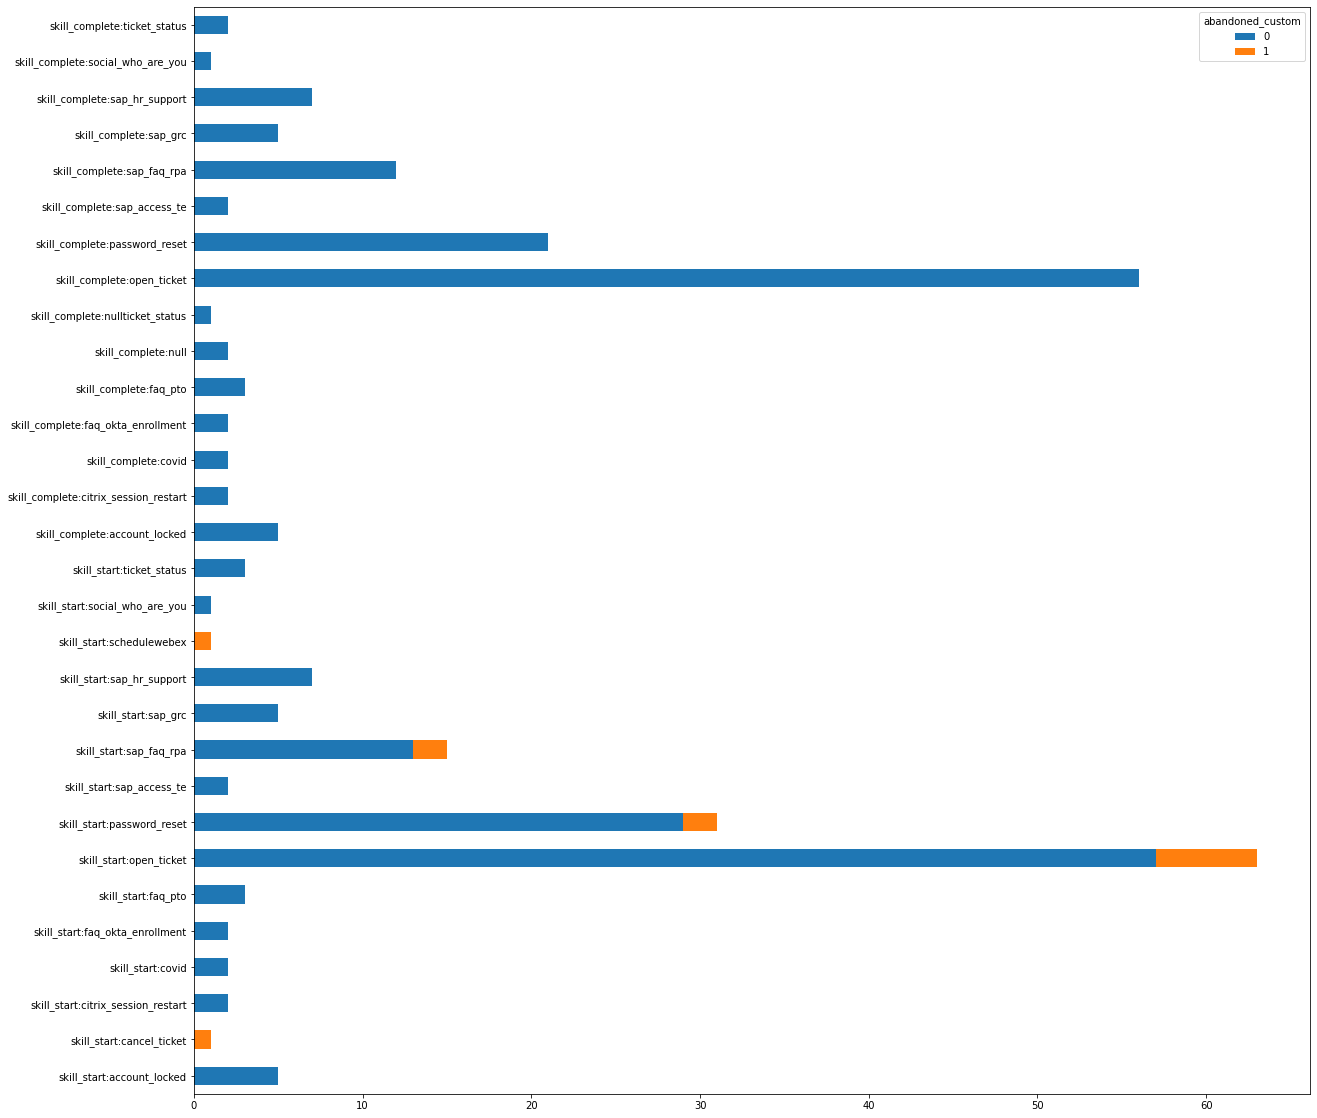

In [8]:
df_abandoned = new_df.groupby(['abandoned_custom']).sum(numeric_only=True)
df_abandoned.transpose().plot.barh(stacked=True, figsize=(20, 20))

<AxesSubplot:>

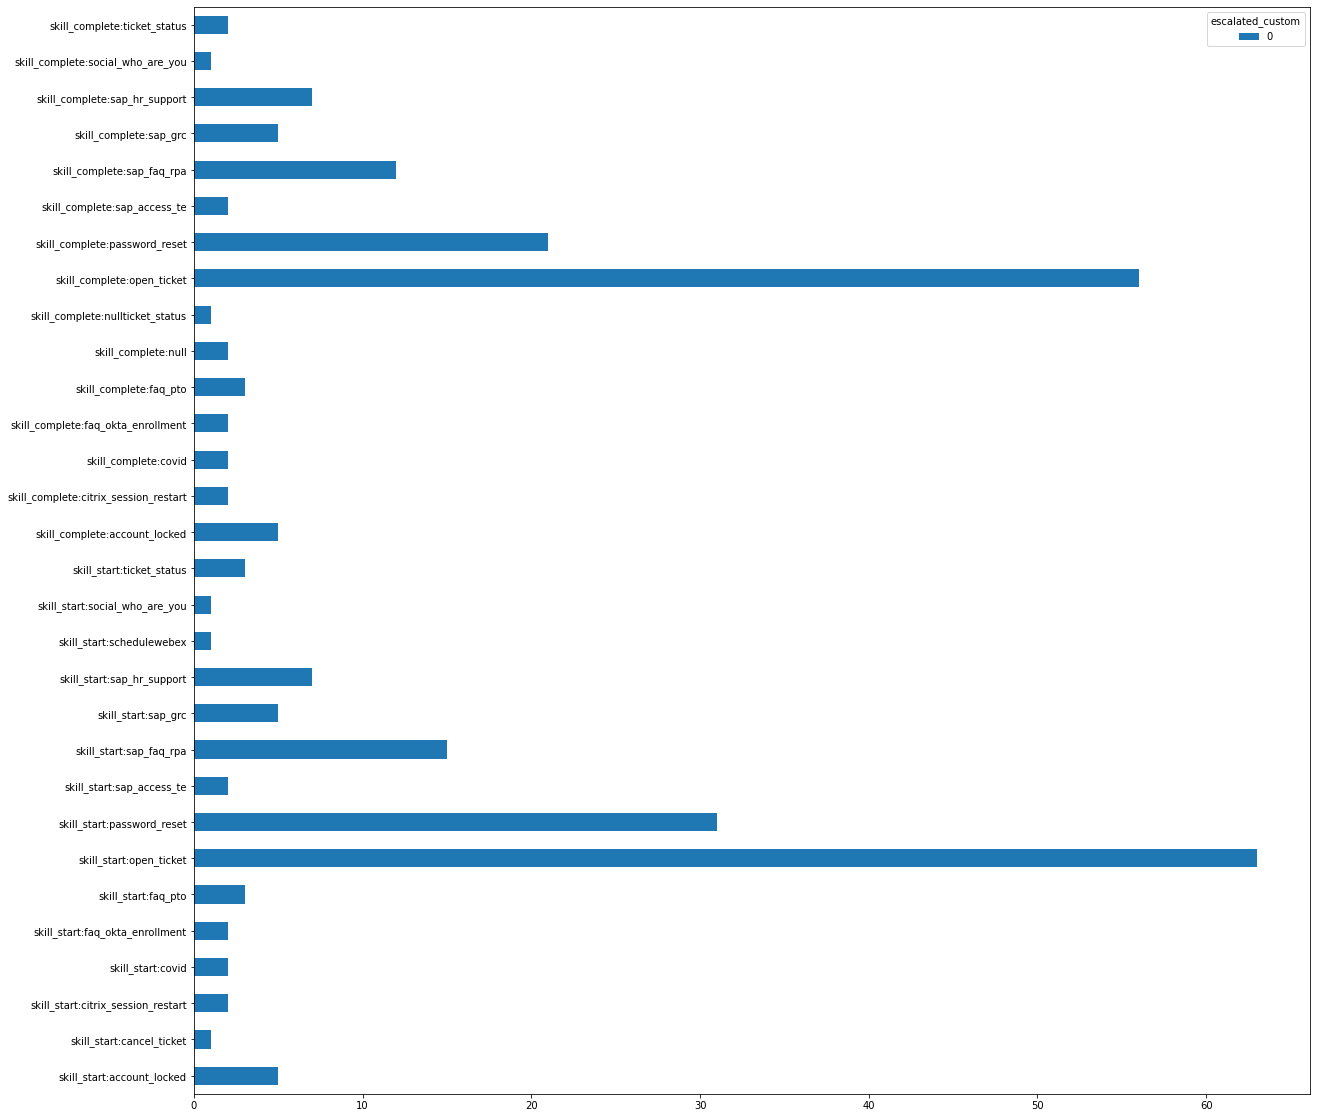

In [9]:
df_escalated = new_df.groupby(['escalated_custom']).sum(numeric_only=True)
df_escalated.transpose().plot.barh(stacked=True, figsize=(20, 20))

<AxesSubplot:>

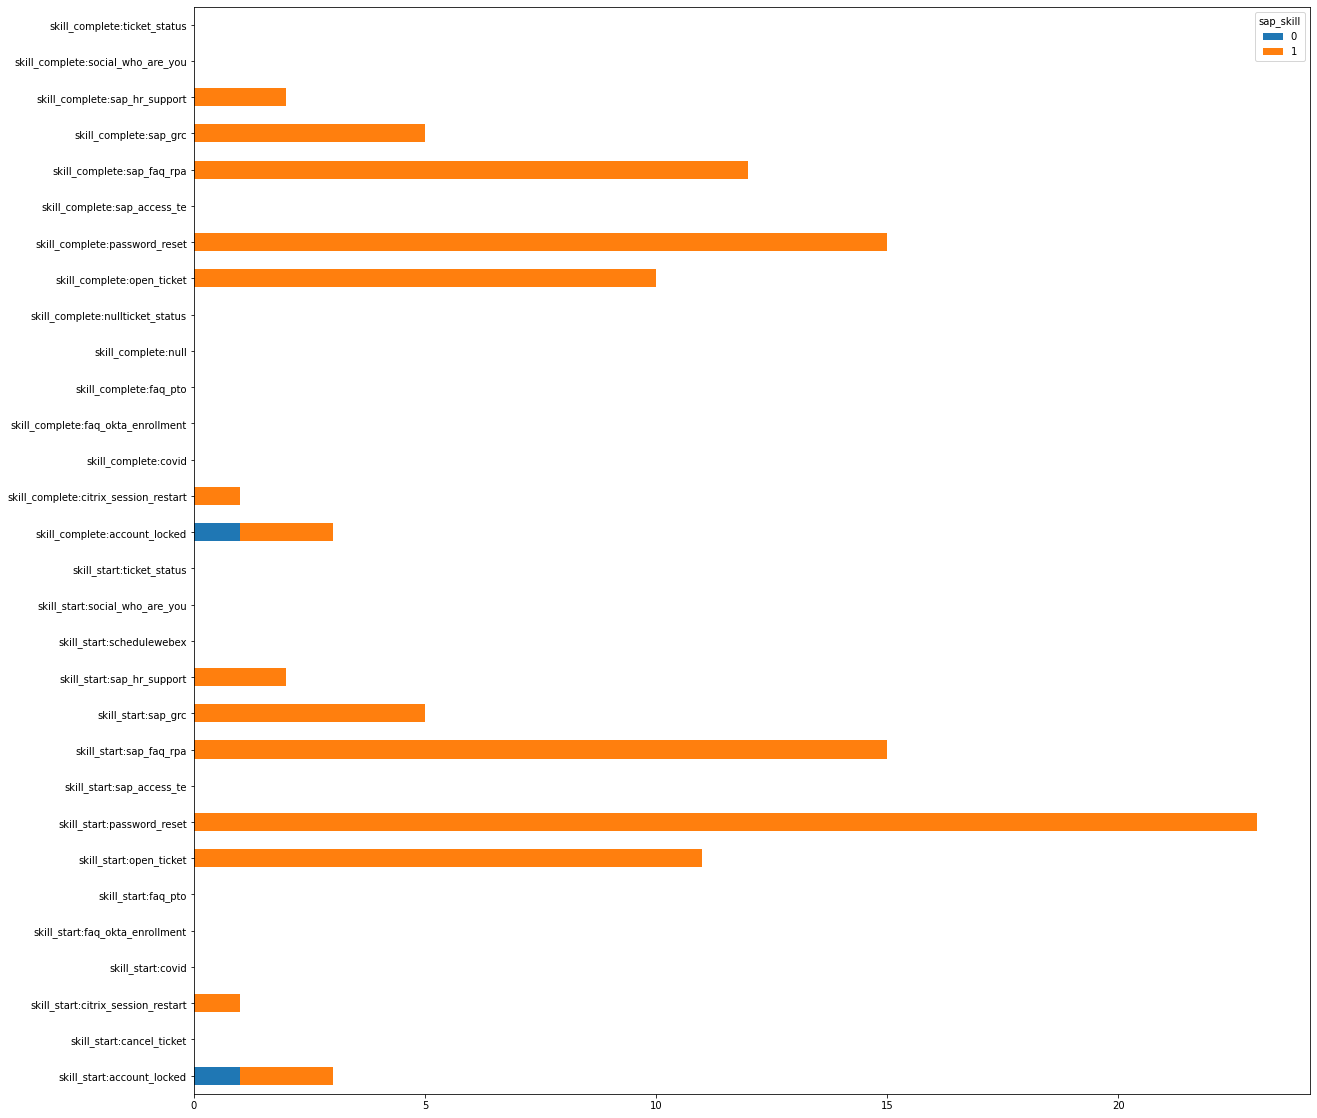

In [10]:
df_sap_skill = new_df.groupby(['sap_skill']).sum(numeric_only=True)
df_sap_skill.transpose().plot.barh(stacked=True, figsize=(20, 20))

<AxesSubplot:>

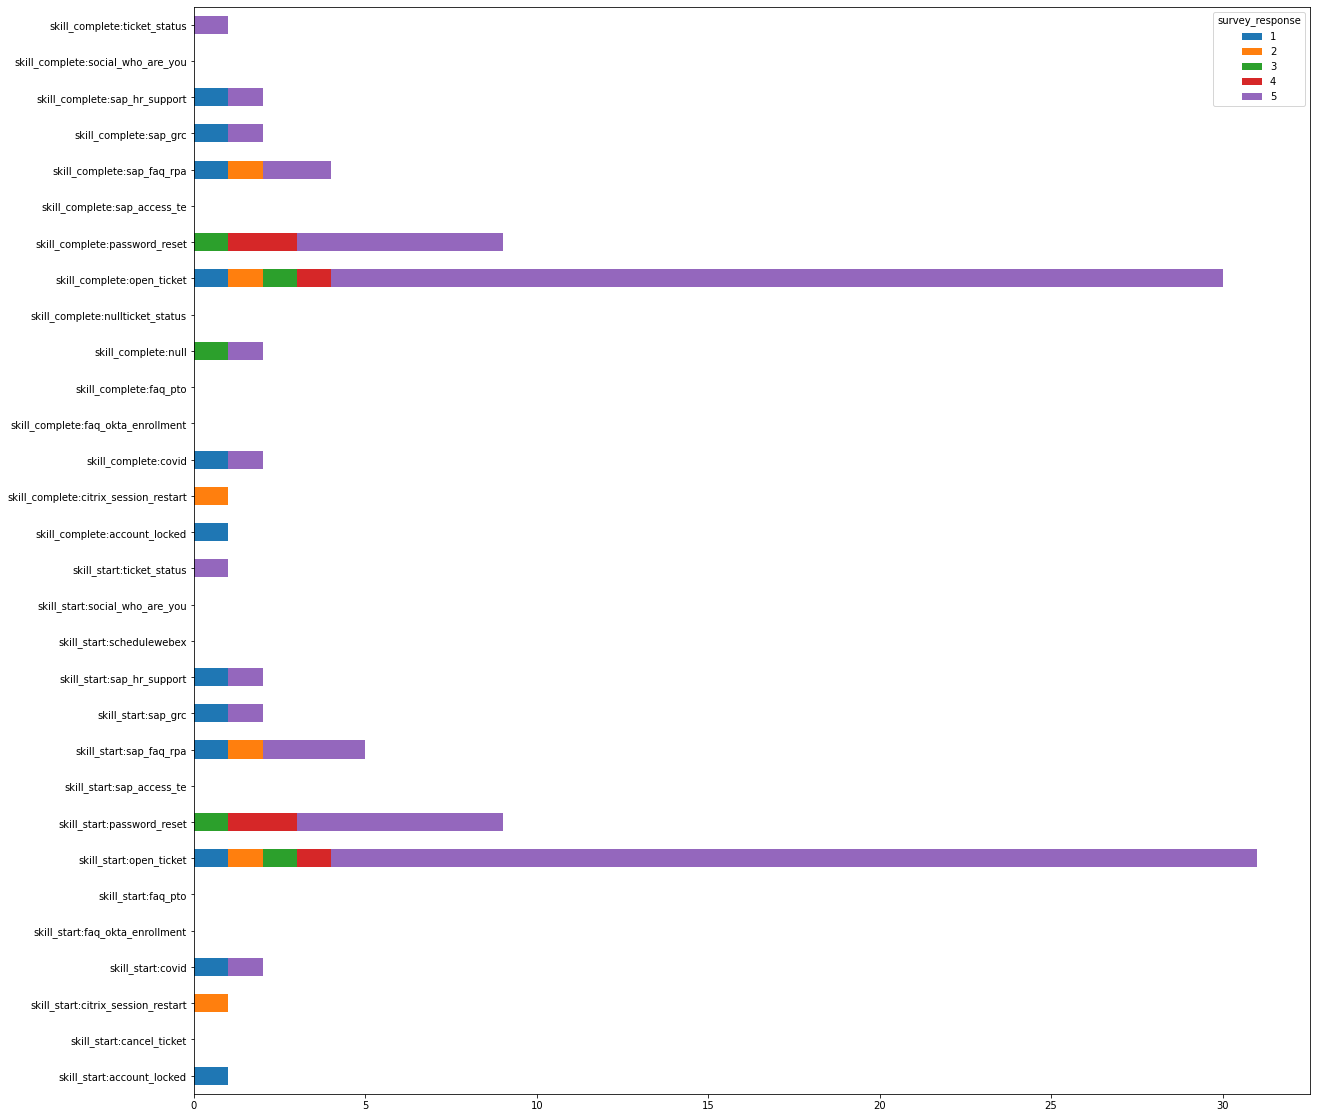

In [11]:
df_surveys = new_df.groupby(['survey_response']).sum(numeric_only=True)
df_surveys.transpose().plot.barh(stacked=True, figsize=(20, 20))

In [63]:
word_string = ''

for i in new_df['Transcript'].iteritems():
    this_convo = i[1].split('||')
    for j in this_convo:
        if j[0:6]!='Amelia':
            this_string = j.split(':',1)
            word_string = word_string + " " + this_string[1]

In [70]:
stopwords = set(STOPWORDS)
stopwords.add('yes')
stopwords.add('need')
max_words = 100

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=max_words).generate(word_string)

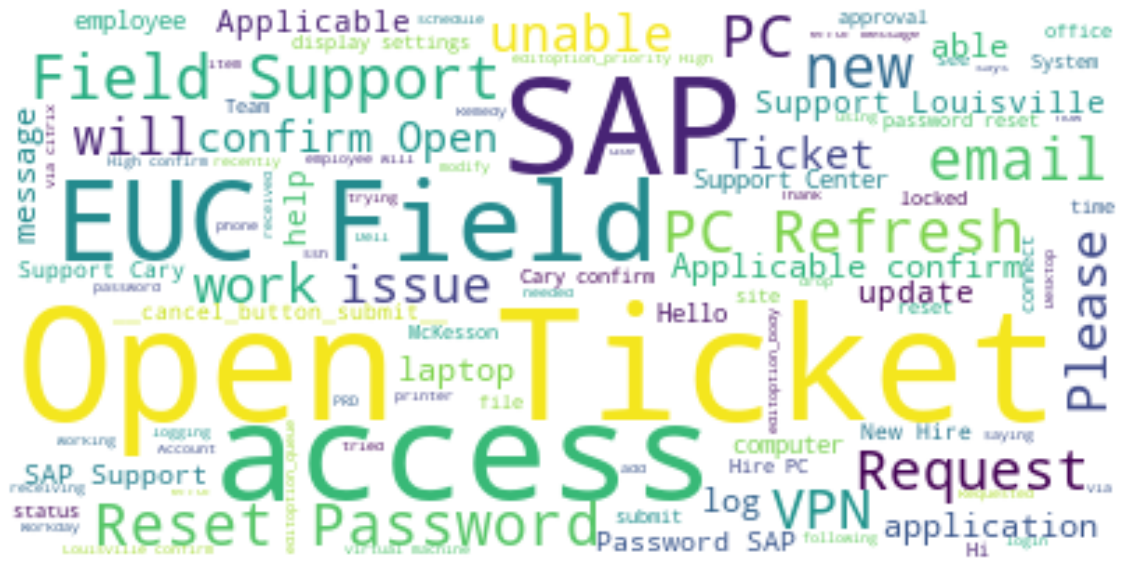

In [72]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(30)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()